# WeatherPy
----



In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
from datetime import datetime

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
#output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [28]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print('The number of city count is: ' + str(len(cities)))

The number of city count is: 611


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [29]:
#Creating URL
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = f'{url}appid={api_key}&units=imperial&q='

#Creating blank list to store Values
count=0
sets=1
lat = []
long = []
country = []
humid = []
cloud = []
max_temp = []
wind_speed = []
date = []
city_name=[]
print("Beginning Data Retrieval")
print("------------------------------")

#FInding all the cities and store it in the list
for city in cities:
    try:
        response=requests.get(query_url+city).json()
        lat.append(response["coord"]["lat"])
        long.append(response["coord"]["lon"])
        country.append(response["sys"]["country"])
        cloud.append(response["clouds"]["all"])
        humid.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        wind_speed.append(response["wind"]["speed"])
        date.append(response["dt"])
        #update record number and set number
        if count>=50:
            count=1
            sets+=1
            city_name.append(city)
        else:
            count+=1
            city_name.append(city)
        print(f"Processing Record {count} of Set {sets} | {city}")
    except Exception:
        print("City not found. Skipping...")  #Skipping all the cities that are not found
print("------------------------------")
print("Data Retrieval Complete")
print("------------------------------")


Beginning Data Retrieval
------------------------------
Processing Record 1 of Set 1 | thompson
Processing Record 2 of Set 1 | luderitz
City not found. Skipping...
Processing Record 3 of Set 1 | kapaa
Processing Record 4 of Set 1 | kousseri
Processing Record 5 of Set 1 | punta arenas
Processing Record 6 of Set 1 | isangel
Processing Record 7 of Set 1 | barrow
Processing Record 8 of Set 1 | tongren
Processing Record 9 of Set 1 | hithadhoo
Processing Record 10 of Set 1 | vaini
Processing Record 11 of Set 1 | san javier
Processing Record 12 of Set 1 | torbay
Processing Record 13 of Set 1 | geraldton
Processing Record 14 of Set 1 | cidreira
Processing Record 15 of Set 1 | zhigansk
Processing Record 16 of Set 1 | hay river
Processing Record 17 of Set 1 | hermanus
Processing Record 18 of Set 1 | kodiak
Processing Record 19 of Set 1 | ugoofaaru
Processing Record 20 of Set 1 | college
Processing Record 21 of Set 1 | bredasdorp
Processing Record 22 of Set 1 | fort nelson
Processing Record 23 of

City not found. Skipping...
Processing Record 34 of Set 4 | bandar-e lengeh
Processing Record 35 of Set 4 | san matias
Processing Record 36 of Set 4 | mandalgovi
City not found. Skipping...
Processing Record 37 of Set 4 | lopez
Processing Record 38 of Set 4 | tabuk
Processing Record 39 of Set 4 | butaritari
Processing Record 40 of Set 4 | sinnamary
Processing Record 41 of Set 4 | norman wells
Processing Record 42 of Set 4 | kutum
Processing Record 43 of Set 4 | saint anthony
Processing Record 44 of Set 4 | soyo
Processing Record 45 of Set 4 | vila
Processing Record 46 of Set 4 | berlevag
Processing Record 47 of Set 4 | rio pardo
Processing Record 48 of Set 4 | kenai
Processing Record 49 of Set 4 | pita
Processing Record 50 of Set 4 | goderich
City not found. Skipping...
Processing Record 1 of Set 5 | new norfolk
Processing Record 2 of Set 5 | alofi
Processing Record 3 of Set 5 | dongsheng
City not found. Skipping...
Processing Record 4 of Set 5 | carnarvon
Processing Record 5 of Set 5 

Processing Record 21 of Set 8 | maldonado
Processing Record 22 of Set 8 | gambiran
Processing Record 23 of Set 8 | saldanha
Processing Record 24 of Set 8 | kudahuvadhoo
Processing Record 25 of Set 8 | fuxin
City not found. Skipping...
Processing Record 26 of Set 8 | kostomuksha
Processing Record 27 of Set 8 | beba
Processing Record 28 of Set 8 | jacareacanga
Processing Record 29 of Set 8 | alyangula
Processing Record 30 of Set 8 | swinoujscie
Processing Record 31 of Set 8 | peniche
Processing Record 32 of Set 8 | dongzhen
Processing Record 33 of Set 8 | prichard
Processing Record 34 of Set 8 | tibacuy
Processing Record 35 of Set 8 | pisco
Processing Record 36 of Set 8 | lingao
Processing Record 37 of Set 8 | dunedin
Processing Record 38 of Set 8 | bourges
Processing Record 39 of Set 8 | wanxian
Processing Record 40 of Set 8 | belaya gora
Processing Record 41 of Set 8 | novopskov
Processing Record 42 of Set 8 | shache
Processing Record 43 of Set 8 | hirara
Processing Record 44 of Set 8 

In [30]:
#Store in a dataframe
city_sum = {'City':city_name,'Lat':lat,'Lng':long,'Max Temp':max_temp,'Humidity':humid,
            'Cloudiness':cloud,'Wind Speed':wind_speed,'Country':country,'Date':date}
city_summary = pd.DataFrame(city_sum)
city_summary.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,thompson,55.7435,-97.8558,-27.40,68,40,12.66,CA,1612662454
1,luderitz,-26.6481,15.1594,67.42,70,0,22.70,NA,1612662656
2,kapaa,22.0752,-159.3190,73.99,49,40,6.91,US,1612662240
3,kousseri,12.0769,15.0306,65.98,23,41,9.98,CM,1612662937
4,punta arenas,-53.1500,-70.9167,51.80,66,0,17.27,CL,1612662441


In [31]:
#Summary Stats for city_summary
city_summary.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,554.000000,554.000000,554.000000,554.00000,554.000000,554.000000,5.540000e+02
mean,22.577012,13.158646,47.510668,74.31769,48.220217,8.334675,1.612663e+09
std,32.914024,90.542819,31.548318,18.23833,41.437880,5.985419,2.523354e+02
min,-54.800000,-179.166700,-42.000000,4.00000,0.000000,0.070000,1.612662e+09
25%,-3.787325,-67.983150,26.600000,65.00000,1.000000,4.000000,1.612662e+09
50%,28.579450,17.946050,58.645000,78.00000,40.000000,6.910000,1.612663e+09
75%,49.570550,88.105475,73.837500,88.00000,90.000000,11.500000,1.612663e+09
max,78.218600,179.316700,89.460000,100.00000,100.000000,32.210000,1.612663e+09


In [32]:
#Exporting the city_summary to a csv file
city_summary.to_csv('City_Weather_Data1.csv')

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [33]:
#Checking if there are any data that has humidity > 100%
print("The max value for humidity is: " + str(city_summary['Humidity'].max()) + '%')
humid_sort = city_summary.sort_values('Humidity',ascending = False)
humid_sort

The max value for humidity is: 100%


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
282,cayenne,4.9333,-52.3333,77.00,100,90,8.05,GF,1612662539
130,astara,38.5000,48.6667,37.40,100,75,4.61,AZ,1612662949
245,taga,46.9500,24.0500,43.00,100,90,1.14,RO,1612662961
253,de land,29.0283,-81.3031,64.40,100,40,4.12,US,1612662962
288,ocala,29.1872,-82.1401,61.00,100,90,10.36,US,1612662965
...,...,...,...,...,...,...,...,...,...
137,saint george,37.1041,-113.5841,57.20,17,1,11.50,US,1612662444
499,ojinaga,29.5667,-104.4167,62.60,13,1,1.68,MX,1612662945
462,guadalupe victoria,32.2869,-115.1050,75.20,13,1,4.61,MX,1612662983
520,calafat,43.9911,22.9328,44.01,7,98,5.21,RO,1612662989


In [34]:
#  Get the indices of cities that have humidity over 100%.
#None are higher than 100 in this dataset

In [35]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
#NA

In [36]:
#Getting the current date
date_now = datetime.date(datetime.now())
print(date_now)

2021-02-06


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

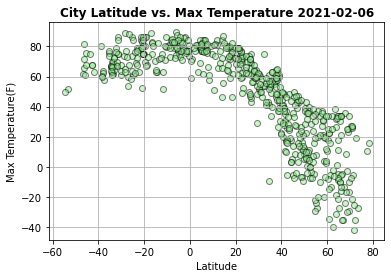

In [37]:
#Lat vs max temp scatter plot
x1 = city_summary['Lat']
y1 = city_summary['Max Temp']
plt.scatter(x1,y1,facecolors = 'lightgreen',edgecolor = 'black',alpha = 0.5)
plt.title(f'City Latitude vs. Max Temperature {date_now}',fontweight = 'bold')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature(F)')
plt.grid()
plt.savefig('Output Image/Lat vs. Max Temp 210206 Plot.png')
plt.show()

## Latitude vs. Humidity Plot

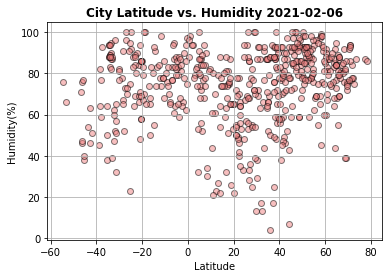

In [38]:
#Lat vs Humidity scatter plot
x2 = city_summary['Lat']
y2 = city_summary['Humidity']
plt.scatter(x2,y2,facecolors = 'lightcoral',edgecolor = 'black',alpha = 0.5)
plt.title(f'City Latitude vs. Humidity {date_now}',fontweight = 'bold')
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.grid()
plt.savefig('Output Image/Lat vs. Humidity 210206 Plot.png')
plt.show()

## Latitude vs. Cloudiness Plot

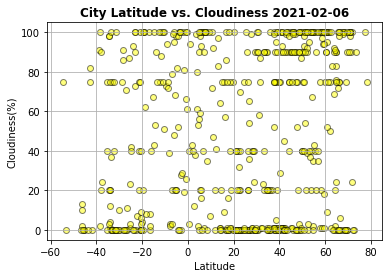

In [39]:
#Lat vs Cloudiness scatter plot
x3 = city_summary['Lat']
y3 = city_summary['Cloudiness']
plt.scatter(x3,y3,facecolors = 'yellow',edgecolor = 'black',alpha = 0.5)
plt.title(f'City Latitude vs. Cloudiness {date_now}',fontweight = 'bold')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.grid()
plt.savefig('Output Image/Lat vs. Cloudiness 210206 Plot.png')
plt.show()

## Latitude vs. Wind Speed Plot

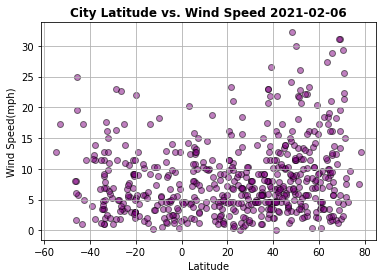

In [40]:
#Lat vs Wind Speed Scatter Plot
x4 = city_summary['Lat']
y4 = city_summary['Wind Speed']
plt.scatter(x4,y4,facecolors = 'purple',edgecolor = 'black',alpha = 0.5)
plt.title(f'City Latitude vs. Wind Speed {date_now}',fontweight = 'bold')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(mph)')
plt.grid()
plt.savefig('Output Image/Lat vs. Wind Speed 210206 Plot.png')
plt.show()

## Linear Regression

In [41]:
#Setting up new dataframes storing data that are in the north hem and south ham
north = city_summary.loc[city_summary['Lat'] >= 0]
south = city_summary.loc[city_summary['Lat'] < 0]
north.head()
#south.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,thompson,55.7435,-97.8558,-27.40,68,40,12.66,CA,1612662454
2,kapaa,22.0752,-159.3190,73.99,49,40,6.91,US,1612662240
3,kousseri,12.0769,15.0306,65.98,23,41,9.98,CM,1612662937
6,barrow,71.2906,-156.7887,-5.80,77,90,14.97,US,1612662445
7,tongren,27.7172,109.1853,56.25,78,99,2.06,CN,1612662937


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8399389533073243


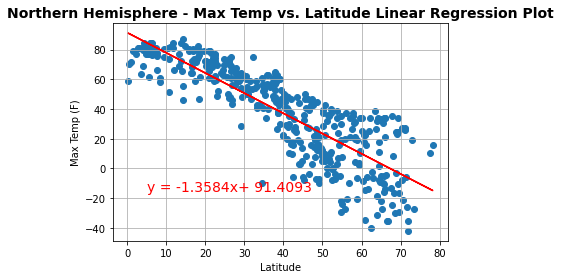

In [42]:
#Linear Reg plot for Northern Hemisphere - Max Temp vs. Latitude Linear Regression
x5 = north['Lat']
y5 = north['Max Temp']
(slope1,intercept1,rvalue1,pvalue1,stderr1) = linregress(x5,y5)
print(f'The r-value is: {rvalue1}')
plt.scatter(x5,y5)
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression Plot',
          fontsize = 14, fontweight = 'bold')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
line1 = x5 * slope1 + intercept1
linear_eq1 = 'y = ' + str(round(slope1,4)) + 'x+ ' + str(round(intercept1,4))
plt.annotate(linear_eq1,(5,-15),fontsize = 14, color = 'red')
plt.plot(x5,line1,color = 'r')
plt.grid()
plt.savefig('Output Image/N Hemp - Max Temp vs. Latitude Linear Regression.png',bbox_inches='tight')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.512494844149511


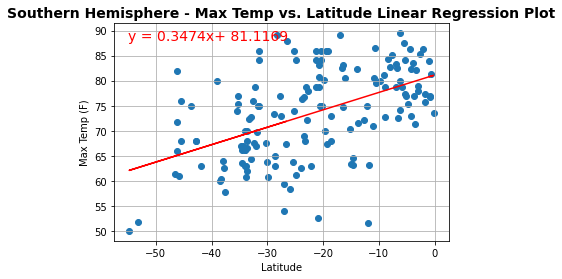

In [44]:
#Linear Reg plot for Southern Hemisphere - Max Temp vs. Latitude Linear Regression
x6 = south['Lat']
y6 = south['Max Temp']
(slope2,intercept2,rvalue2,pvalue2,stderr2) = linregress(x6,y6)
print(f'The r-value is: {rvalue2}')
plt.scatter(x6,y6)
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression Plot',
          fontsize = 14, fontweight = 'bold')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
line2 = x6 * slope2 + intercept2
linear_eq2 = 'y = ' + str(round(slope2,4)) + 'x+ ' + str(round(intercept2,4))
plt.annotate(linear_eq2,(-55,88),fontsize = 14, color = 'red')
plt.plot(x6,line2,color = 'r')
plt.grid()
plt.savefig('Output Image/S Hemp - Max Temp vs. Latitude Linear Regression.png',bbox_inches='tight')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.2696603970887584


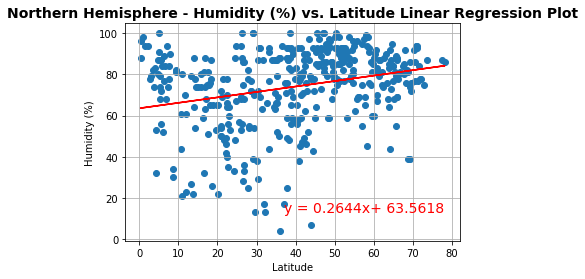

In [45]:
#Linear Reg plot for Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression
x7 = north['Lat']
y7 = north['Humidity']
(slope3,intercept3,rvalue3,pvalue3,stderr3) = linregress(x7,y7)
print(f'The r-value is: {rvalue3}')
plt.scatter(x7,y7)
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression Plot',
          fontsize = 14, fontweight = 'bold')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
line3 = x7 * slope3 + intercept3
linear_eq3 = 'y = ' + str(round(slope3,4)) + 'x+ ' + str(round(intercept3,4))
plt.annotate(linear_eq3,(37,13),fontsize = 14, color = 'red')
plt.plot(x7,line3,color = 'r')
plt.grid()
plt.savefig('Output Image/N Hemp - Humidity vs. Latitude Linear Regression.png',bbox_inches='tight')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.26176421446543396


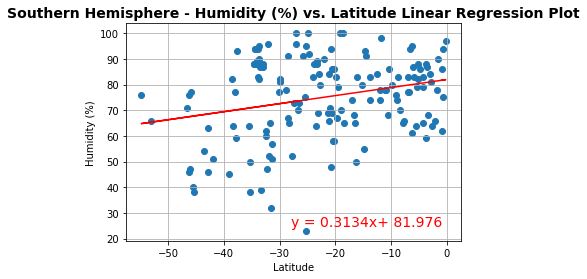

In [46]:
#Linear Reg plot for Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression
x8 = south['Lat']
y8 = south['Humidity']
(slope4,intercept4,rvalue4,pvalue4,stderr4) = linregress(x8,y8)
print(f'The r-value is: {rvalue4}')
plt.scatter(x8,y8)
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression Plot',
          fontsize = 14, fontweight = 'bold')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
line4 = x8 * slope4 + intercept4
linear_eq4 = 'y = ' + str(round(slope4,4)) + 'x+ ' + str(round(intercept4,4))
plt.annotate(linear_eq4,(-28,25),fontsize = 14, color = 'red')
plt.plot(x8,line4,color = 'r')
plt.grid()
plt.savefig('Output Image/S Hemp - Humidity vs. Latitude Linear Regression.png',bbox_inches='tight')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.2006132224418831


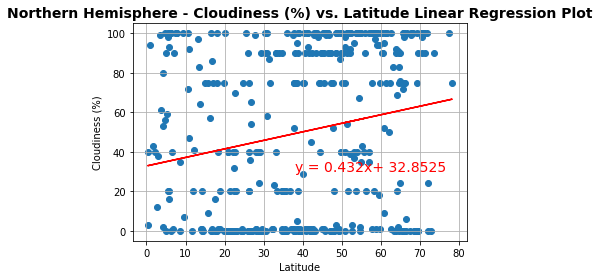

In [47]:
#Linear Reg Plot for Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
x9 = north['Lat']
y9 = north['Cloudiness']
(slope5,intercept5,rvalue5,pvalue5,stderr5) = linregress(x9,y9)
print(f'The r-value is: {rvalue5}')
plt.scatter(x9,y9)
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression Plot',
          fontsize = 14, fontweight = 'bold')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
line5 = x9 * slope5 + intercept5
linear_eq5 = 'y = ' + str(round(slope5,4)) + 'x+ ' + str(round(intercept5,4))
plt.annotate(linear_eq5,(38,30),fontsize = 14, color = 'red')
plt.plot(x9,line5,color = 'r')
plt.grid()
plt.savefig('Output Image/N Hemp - Cloudiness vs. Latitude Linear Regression.png',bbox_inches='tight')
plt.show()

The r-value is: 0.3125552582713348


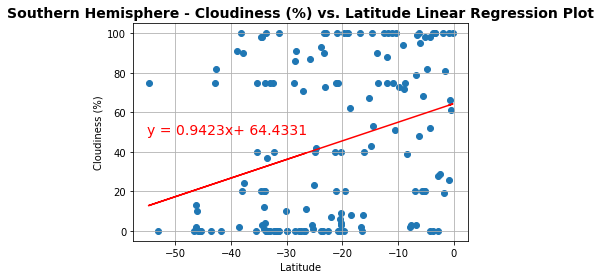

In [48]:
#Linear Reg Plot for Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
x10 = south['Lat']
y10 = south['Cloudiness']
(slope6,intercept6,rvalue6,pvalue6,stderr6) = linregress(x10,y10)
print(f'The r-value is: {rvalue6}')
plt.scatter(x10,y10)
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression Plot',
          fontsize = 14, fontweight = 'bold')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
line6 = x10 * slope6 + intercept6
linear_eq6 = 'y = ' + str(round(slope6,4)) + 'x+ ' + str(round(intercept6,4))
plt.annotate(linear_eq6,(-55,49),fontsize = 14, color = 'red')
plt.plot(x10,line6,color = 'r')
plt.grid()
plt.savefig('Output Image/S Hemp - Cloudiness vs. Latitude Linear Regression.png',bbox_inches='tight')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.22121984160033564


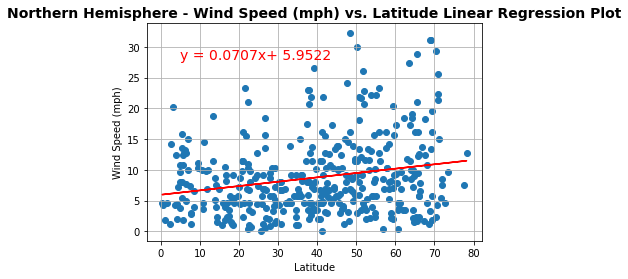

In [49]:
#Linear Reg Plot for Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
x11 = north['Lat']
y11 = north['Wind Speed']
(slope7,intercept7,rvalue7,pvalue7,stderr7) = linregress(x11,y11)
print(f'The r-value is: {rvalue7}')
plt.scatter(x11,y11)
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression Plot',
          fontsize = 14, fontweight = 'bold')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
line7 = x11 * slope7 + intercept7
linear_eq7 = 'y = ' + str(round(slope7,4)) + 'x+ ' + str(round(intercept7,4))
plt.annotate(linear_eq7,(5,28),fontsize = 14, color = 'red')
plt.plot(x11,line7,color = 'r')
plt.grid()
plt.savefig('Output Image/N Hemp - Wind Speed vs. Latitude Linear Regression.png',bbox_inches='tight')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.2397742139906837


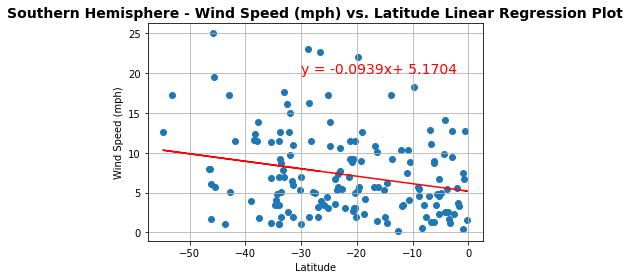

In [50]:
#Linear Reg Plot for Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
x12 = south['Lat']
y12 = south['Wind Speed']
(slope8,intercept8,rvalue8,pvalue8,stderr8) = linregress(x12,y12)
print(f'The r-value is: {rvalue8}')
plt.scatter(x12,y12)
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression Plot',
          fontsize = 14, fontweight = 'bold')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
line8 = x12 * slope8 + intercept8
linear_eq8 = 'y = ' + str(round(slope8,4)) + 'x+ ' + str(round(intercept8,4))
plt.annotate(linear_eq8,(-30,20),fontsize = 14, color = 'red')
plt.plot(x12,line8,color = 'r')
plt.grid()
plt.savefig('Output Image/S Hemp - Wind Speed vs. Latitude Linear Regression.png',bbox_inches='tight')
plt.show()